In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from numpy import pi
import math
from os import path

# load laser tracker data
lt_all = pd.read_csv(path.expanduser("~/uwb_logs/laser_tracker/laser_tracker_data/cornaredo_from_xml.csv"))

# load uwb localization data from the 4 runs
u0 = pd.read_csv(path.expanduser("~/uwb_logs/laser_tracker/uwb_laser_tracker_bags/rosbag2_2024_07_26-12_14_22/position.csv"))
u1 = pd.read_csv(path.expanduser("~/uwb_logs/laser_tracker/uwb_laser_tracker_bags/rosbag2_2024_07_26-12_19_11/position.csv"))
u2 = pd.read_csv(path.expanduser("~/uwb_logs/laser_tracker/uwb_laser_tracker_bags/rosbag2_2024_07_26-12_21_45/position.csv"))
u3 = pd.read_csv(path.expanduser("~/uwb_logs/laser_tracker/uwb_laser_tracker_bags/rosbag2_2024_07_26-12_28_39/position.csv"))

# drop unnecessary index column
lt_all = lt_all.drop(columns=['Unnamed: 0'])
lt_all.rename(columns={'x': 'n', 'y': 'e'}, inplace=True)

# uwb anchor coordinates
a1_u = pd.Series({'x': 0.0, 'y': 21.01})
a2_u = pd.Series({'x': 0.0, 'y': 0.0})
a3_u = pd.Series({'x': 9.68, 'y': 0.0})

# translate laser tracker data to match uwb origin coordinates
a2_lt = lt_all[(lt_all.name == 'TS0004') | (lt_all.name == 'TS0005') | (lt_all.name == 'TS0006')][['e', 'n']].mean()
print(f"offset: e={a2_lt.e}, n={a2_lt.n}")
lt_all.n = lt_all.n - a2_lt.n
lt_all.e = lt_all.e - a2_lt.e

# rotate laser tracker data to match uwb a3 coordinates (a3 is on the uwb reference frame x-axis)
a3_lt = lt_all[(lt_all.name == 'TS0007') | (lt_all.name == 'TS0008') | (lt_all.name == 'TS0009')][['e', 'n']].mean()
theta = -math.atan2(a3_lt.n, a3_lt.e)
print(f"offset: theta={theta}")
lt_all['x'] = lt_all.e * np.cos(theta) - lt_all.n * np.sin(theta)
lt_all['y'] = lt_all.e * np.sin(theta) + lt_all.n * np.cos(theta)

# recompute all laser tracker points and check alignment of third point
a1_lt = lt_all[(lt_all.name == 'TS0001') | (lt_all.name == 'TS0002') | (lt_all.name == 'TS0003')][['x', 'y']].mean()
a2_lt = lt_all[(lt_all.name == 'TS0004') | (lt_all.name == 'TS0005') | (lt_all.name == 'TS0006')][['x', 'y']].mean()
a3_lt = lt_all[(lt_all.name == 'TS0007') | (lt_all.name == 'TS0008') | (lt_all.name == 'TS0009')][['x', 'y']].mean()
print(f"a1_lt - a1_u: x={(a1_lt-a1_u).x:.4f}, y={(a1_lt-a1_u).y:.4f}")
print(f"a2_lt - a2_u: x={(a2_lt-a2_u).x:.4f}, y={(a2_lt-a2_u).y:.4f}")
print(f"a3_lt - a3_u: x={(a3_lt-a3_u).x:.4f}, y={(a3_lt-a3_u).y:.4f}")

# drop unnecessary rows (not recorded in uwb localization data)
lt = lt_all.iloc[10:]

# laser tracker timestamp of the start and end of each run
t_0 = float(lt[lt.name == "TS_Auto_0012"].t)
t_1 = float(lt[lt.name == "TS_Auto_0656"].t)
t_2 = float(lt[lt.name == "TS_Auto_1004"].t)
t_3 = float(lt[lt.name == "TS_Auto_1554"].t)
t_4 = float(lt[lt.name == "TS_Auto_2522"].t)
print(f"t_0: {t_0}, t_1: {t_1}, t_2: {t_2}, t_3: {t_3}, t_4: {t_4}")

# laser tracker data each run
lt0 = lt[(t_0 < lt.t) & (lt.t <= t_1)]
lt1 = lt[(t_1 < lt.t) & (lt.t <= t_2)]
lt2 = lt[(t_2 < lt.t) & (lt.t <= t_3)]
lt3 = lt[(t_3 < lt.t) & (lt.t <= t_4)]

offset: e=3.301536, n=-2.7813326666666662
offset: theta=-2.5476708401666026
a1_lt - a1_u: x=-0.0290, y=-0.0464
a2_lt - a2_u: x=-0.0000, y=0.0000
a3_lt - a3_u: x=0.0359, y=0.0000
t_0: 1721985200.75, t_1: 1721985300.89, t_2: 1721985546.31, t_3: 1721985737.94, t_4: 1721986245.15


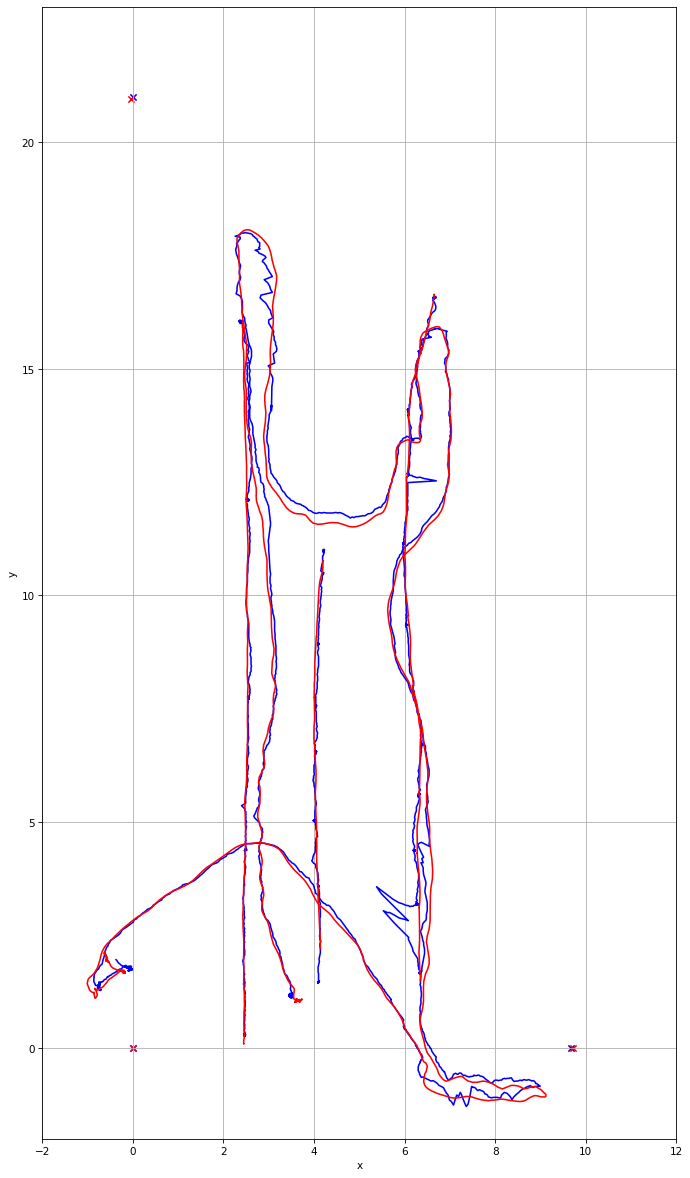

In [8]:
plt.figure(figsize=(20, 20), dpi=75)
plt.xlim(-2, 12)
plt.ylim(-2, 23)
plt.gca().set_aspect('equal')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(a1_u.x, a1_u.y, color='blue', marker='x')
plt.scatter(a2_u.x, a2_u.y, color='blue', marker='x')
plt.scatter(a3_u.x, a3_u.y, color='blue', marker='x')

plt.scatter(a1_lt.x, a1_lt.y, color='red', marker='x')
plt.scatter(a2_lt.x, a2_lt.y, color='red', marker='x')
plt.scatter(a3_lt.x, a3_lt.y, color='red', marker='x')

plt.plot(u0.x, u0.y, color='blue')
plt.plot(u1.x, u1.y, color='blue')
plt.plot(u2.x, u2.y, color='blue')
plt.plot(u3.x, u3.y, color='blue')

plt.plot(lt0.x, lt0.y, color='red')
plt.plot(lt1.x, lt1.y, color='red')
plt.plot(lt2.x, lt2.y, color='red')
plt.plot(lt3.x, lt3.y, color='red')
plt.show()